In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
from fastai.vision.all import *

In [8]:
path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/"

In [9]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(114, min_scale=0.5),
   batch_tfms=aug_transforms())

In [10]:
dls = fields.dataloaders(path)

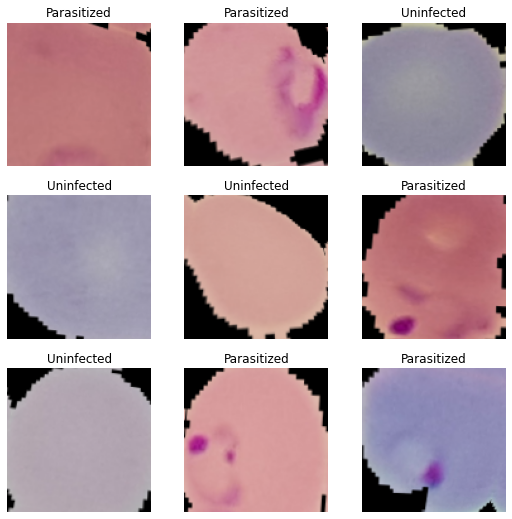

In [11]:
dls.show_batch()

In [12]:
dls.vocab

['Parasitized', 'Uninfected']

In [13]:
learn = cnn_learner(dls,resnet34,metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

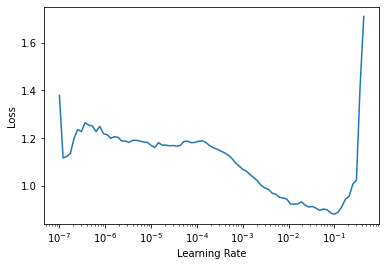

In [14]:
lrn_min,lrn_steep = learn.lr_find()

In [15]:
learn.fine_tune(1,)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.284701,0.166272,0.061054,0.938946,04:44


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.188520,0.097156,0.034473,0.965527,03:18


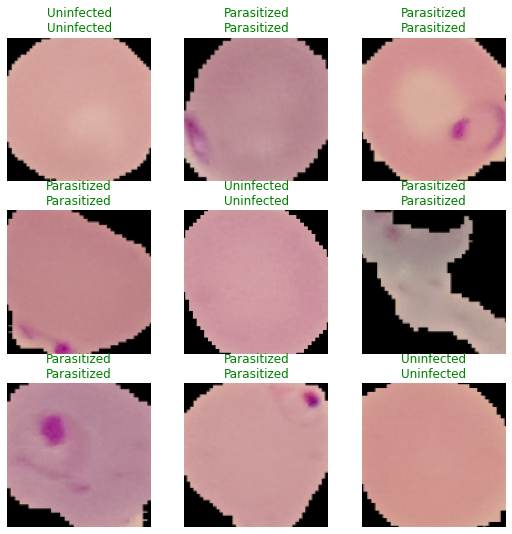

In [16]:
learn.show_results()

In [17]:
learn = cnn_learner(dls,resnet50,metrics=[error_rate,accuracy])


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

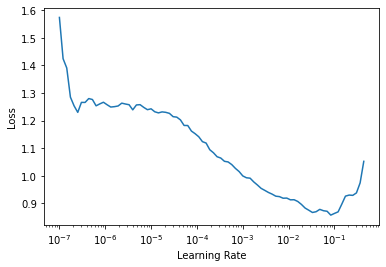

In [18]:
lrn_min,lrn_steep = learn.lr_find()


In [19]:
learn.fine_tune(1,)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.250446,0.144808,0.050168,0.949832,03:24


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.179543,0.086670,0.028123,0.971877,03:38


# 97.2% Accuracy